day.csv have the following fields:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter) - **associated with the labels may indicate that there is some order to them - which is actually not the case. So, it is advisable to convert such feature values into categorical string values before proceeding with model building**
- yr : year (0: 2018, 1:2019) - **don't drop it**
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered --  **target variable**



## Step 1: Reading and Understanding the Data

In [122]:
import pandas as pd
import numpy as np
import warnings

# Supress Warnings
warnings.filterwarnings('ignore')

bikes = pd.read_csv("https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv")
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [123]:
bikes.shape

(730, 16)

In [124]:
bikes.info()
# no empty values, don't need impute data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [125]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step2: Data cleanning

remove columns "instant", "dteday", "casual", "registered"

In [126]:
bikes.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Visualising the Data

Use `matplotlib` and `seaborn` to visualising data

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3.1 Visualising Numeric Variables


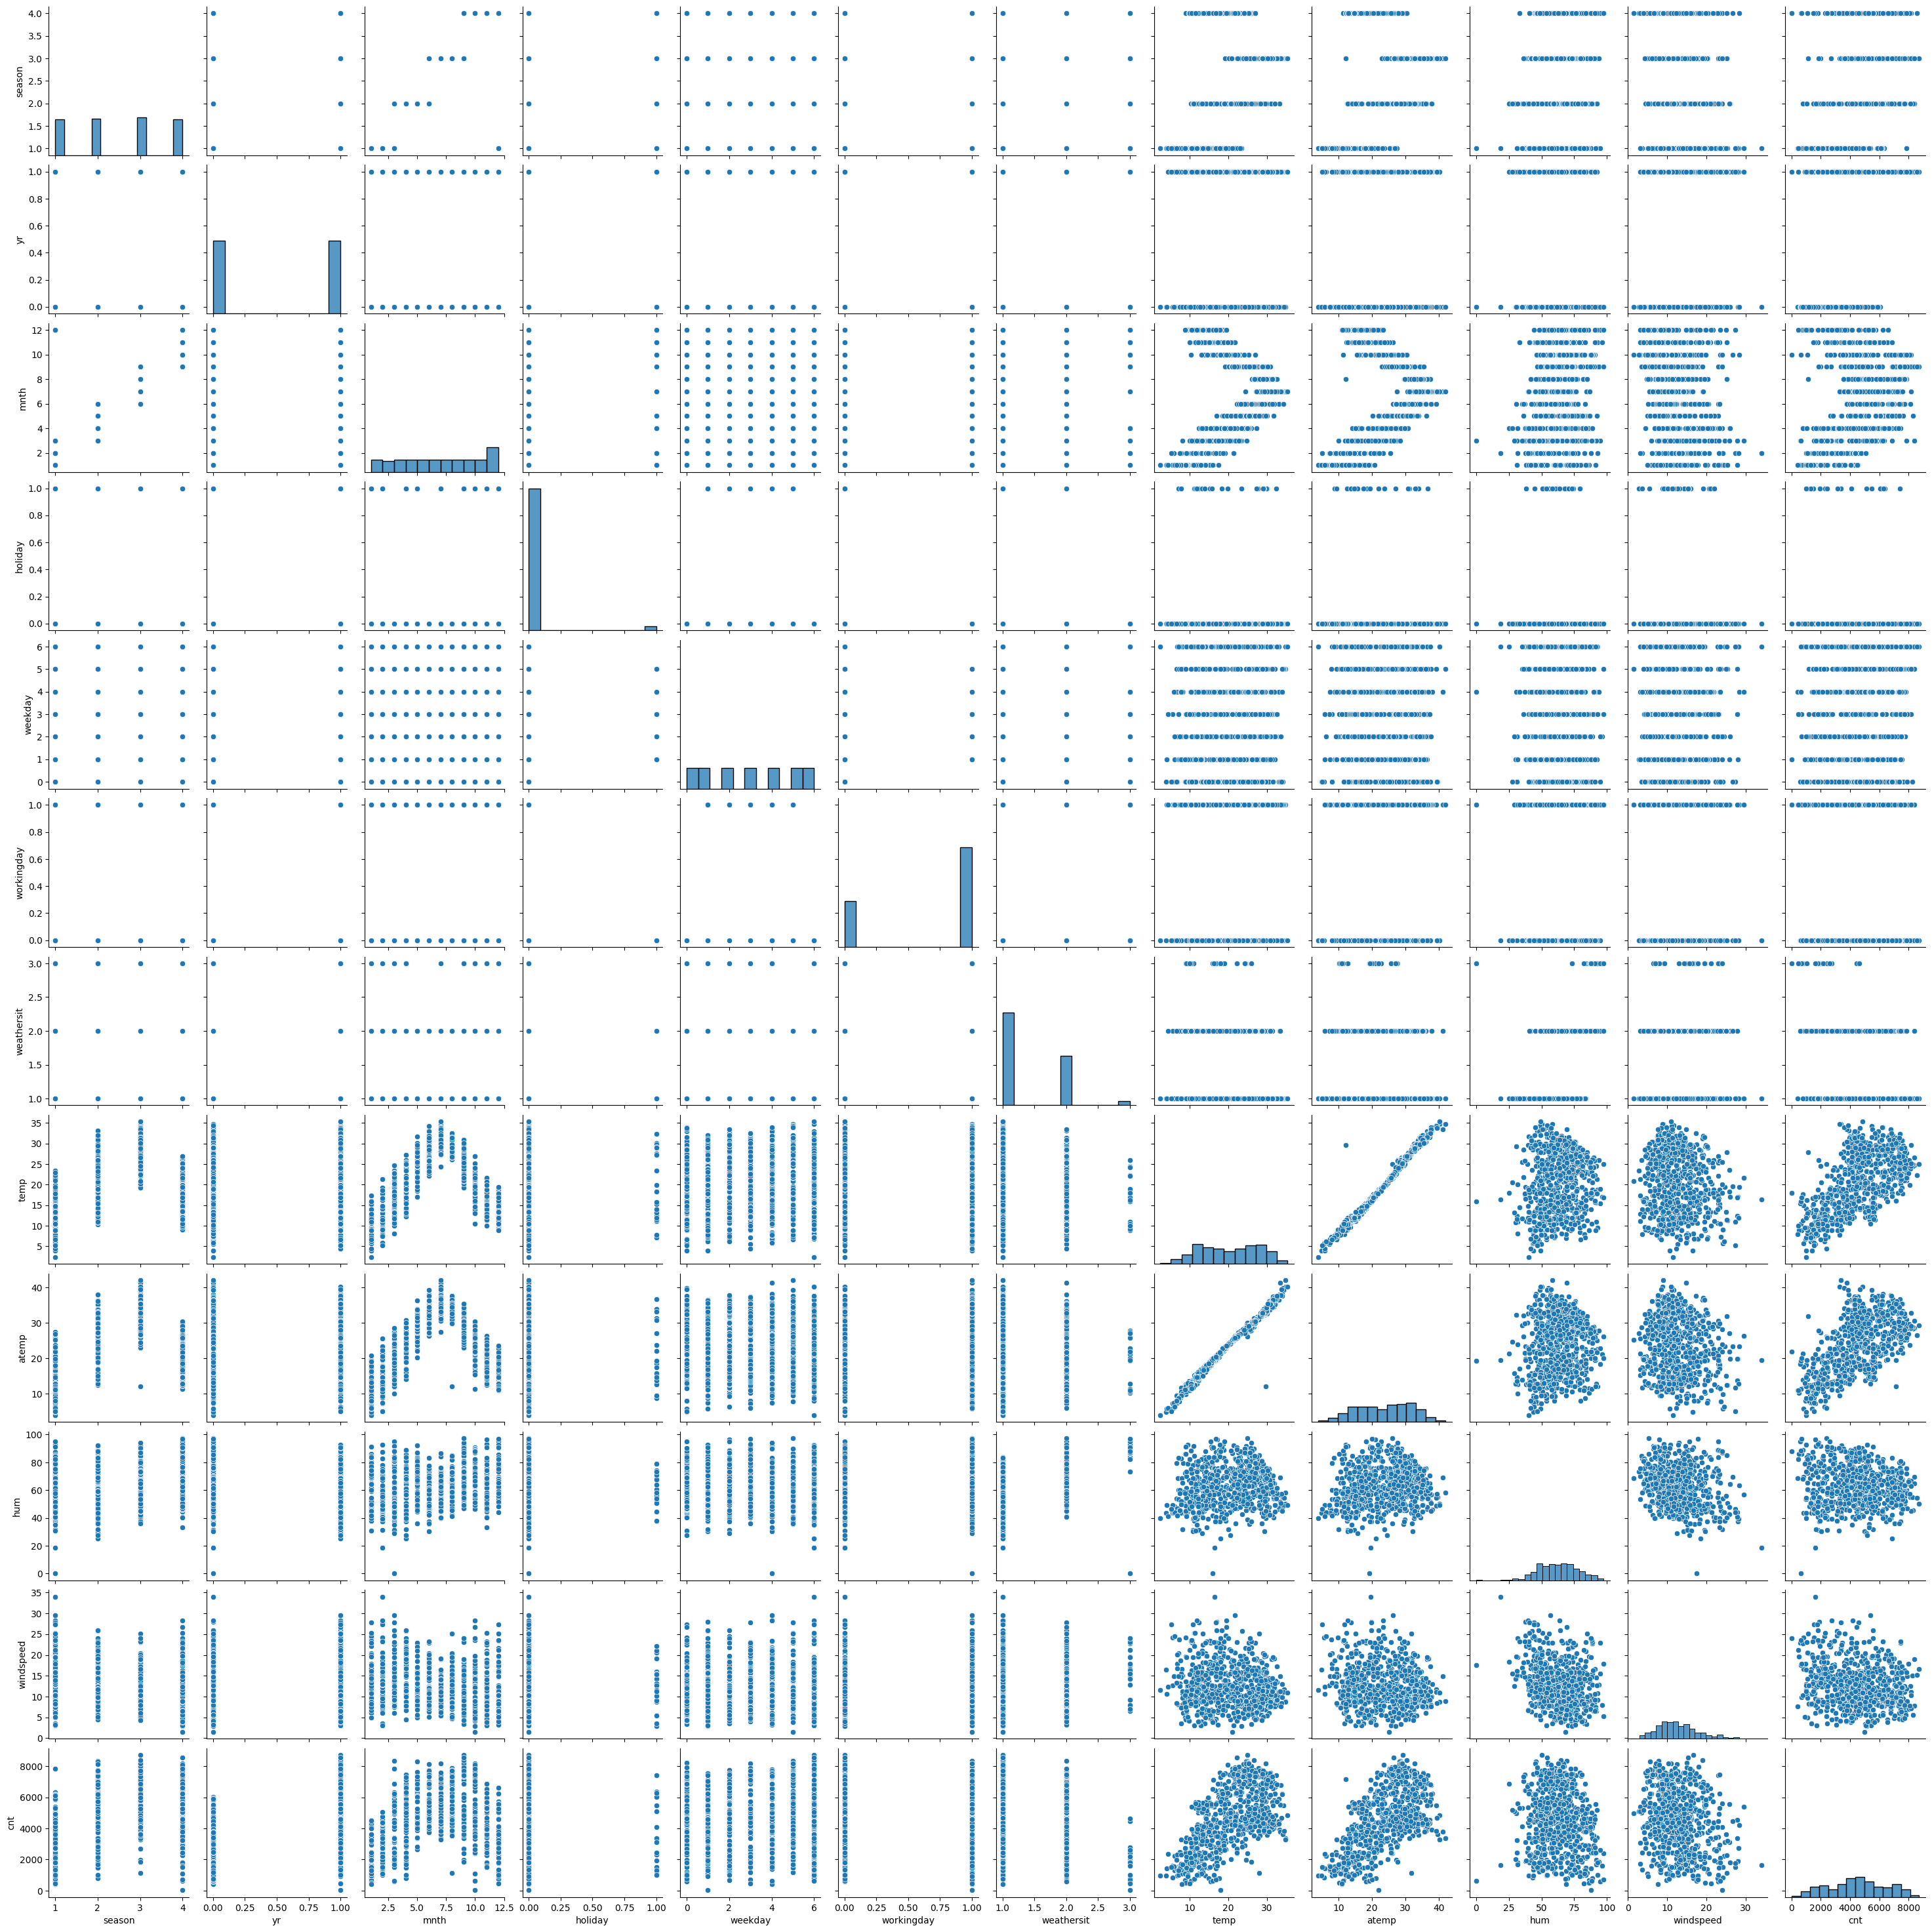

In [128]:
# comment it to speed up the debug process
sns.pairplot(bikes)
plt.show()

### 3.2 Visualising Categorical Variables

This are categorical variables: `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`

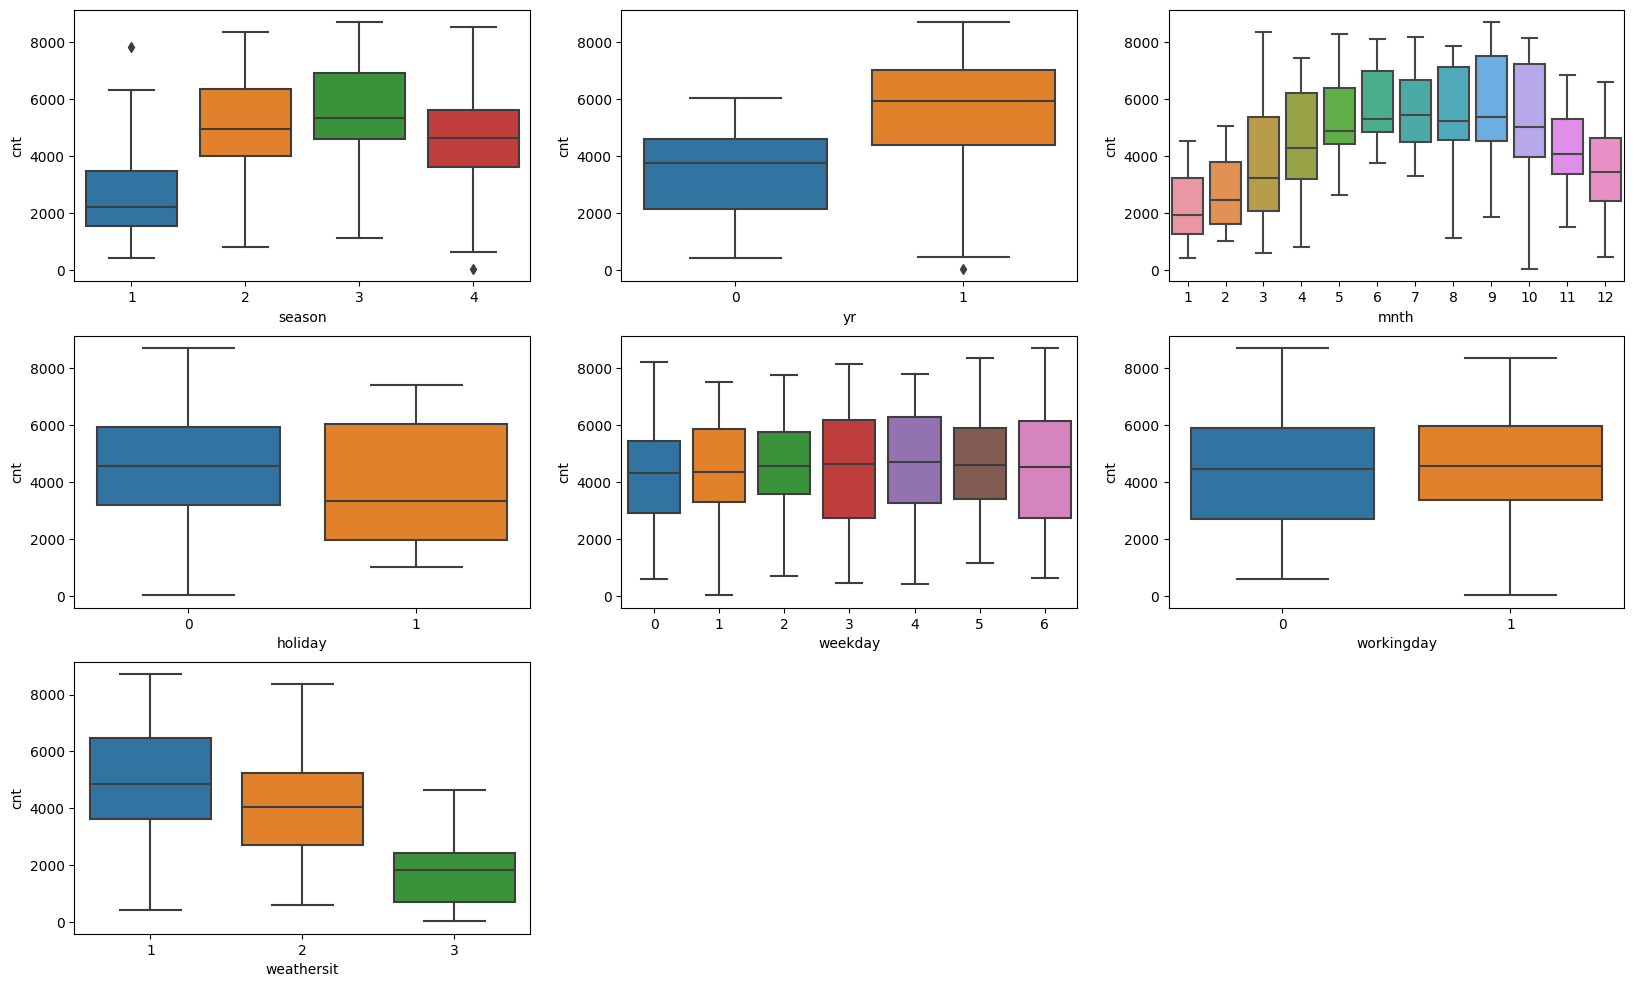

In [129]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

## Step 4: Dummy Data
We don't have text data, so we don't need to convert them to numeric.

We need generate dummy data for `season`, `mnth`, `weekday` and `weathersit`.

## 4.1 Convert categorical data to String

In [130]:
season_map = {1: "spring", 2:"summer", 3:"fall", 4:"winter"}
month_map = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}
weekday_map = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
weathersit_map = {1: "Clear", 2: "MistCloudy", 3: "LightSnow", 4: "HeavyRain"}

bikes["season_str"] = bikes["season"].apply(lambda x: season_map.get(x))
bikes["mnth_str"] = bikes["mnth"].apply(lambda x: month_map.get(x))
bikes["weekday_str"] = bikes["weekday"].apply(lambda x: weekday_map.get(x))
bikes["weathersit_str"] = bikes["weathersit"].apply(lambda x: weathersit_map.get(x))

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_str,mnth_str,weekday_str,weathersit_str
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,spring,Jan,Sat,MistCloudy
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,spring,Jan,Sun,MistCloudy
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,spring,Jan,Mon,Clear
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,spring,Jan,Tue,Clear
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,spring,Jan,Wed,Clear


### 4.2 Generate dummy data

In [131]:
# define a function to add dummy data

def add_dummies(df, column_name):
  dummies = pd.get_dummies(df[column_name], drop_first = True)
  df = pd.concat([df, dummies], axis = 1)
  return df

In [132]:
bikes = add_dummies(bikes, "season_str")
bikes.drop(['season', 'season_str'], axis = 1, inplace = True)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,mnth_str,weekday_str,weathersit_str,spring,summer,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,Jan,Sat,MistCloudy,1,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,Jan,Sun,MistCloudy,1,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,Mon,Clear,1,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,Tue,Clear,1,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,Wed,Clear,1,0,0


In [133]:
bikes = add_dummies(bikes, "weathersit_str")
bikes.drop(['weathersit', 'weathersit_str'], axis = 1, inplace = True)
bikes.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,mnth_str,weekday_str,spring,summer,winter,LightSnow,MistCloudy
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,Jan,Sat,1,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,Jan,Sun,1,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,Mon,1,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,Tue,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,Wed,1,0,0,0,0


In [134]:
bikes = add_dummies(bikes, "weekday_str")
bikes.drop(['weekday', 'weekday_str'], axis = 1, inplace = True)
bikes.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_str,...,summer,winter,LightSnow,MistCloudy,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,Jan,...,0,0,0,1,0,1,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,Jan,...,0,0,0,1,0,0,1,0,0,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,Jan,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,Jan,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,Jan,...,0,0,0,0,0,0,0,0,0,1


In [135]:
bikes = add_dummies(bikes, "mnth_str")
bikes.drop(['mnth', 'mnth_str'], axis = 1, inplace = True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [136]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  LightSnow   730 non-null    uint8  
 12  MistCloudy  730 non-null    uint8  
 13  Mon         730 non-null    uint8  
 14  Sat         730 non-null    uint8  
 15  Sun         730 non-null    uint8  
 16  Thu         730 non-null    uint8  
 17  Tue         730 non-null    uint8  
 18  Wed         730 non-null    uint8  
 19  Aug         730 non-null    u

as we can see, there are no missing values in the dataset

## Step 5: Splitting the Data into Training and Testing Sets


In [137]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

### 5.1 Rescaling the Features

In [138]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [139]:
# Apply scaler() to numeric data
num_vars = ["temp", "atemp",	"hum",	"windspeed", "cnt"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


In [140]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.2 Check the correlation coefficients
Check the correlation coefficient between **numerical data**

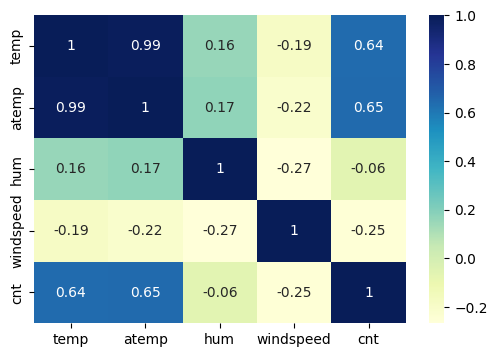

In [141]:
plt.figure(figsize = (6, 4))
numeric_df_train = df_train[["temp", "atemp",	"hum",	"windspeed", "cnt"]]
sns.heatmap(numeric_df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

`atemp` seems to the correlated to `cnt` the most. Let's see a pairplot for them

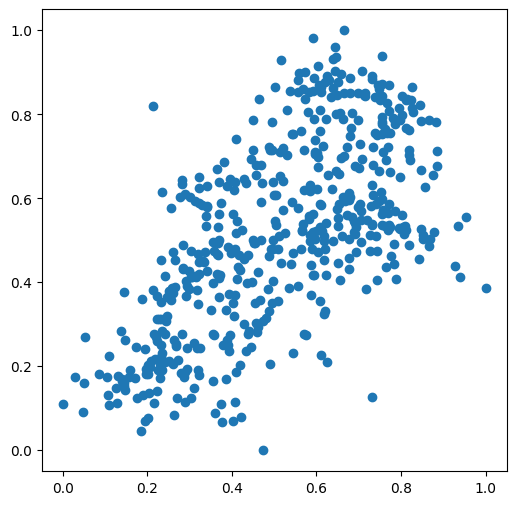

In [142]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### 5.3 Dividing into X and Y sets for the model building

In [143]:
y_train = df_train.pop('cnt')

In [144]:
X_train = df_train

In [145]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.243137,0.245098,0.24902,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.429398,0.430568,0.43287,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  LightSnow   510 non-null    uint8  
 11  MistCloudy  510 non-null    uint8  
 12  Mon         510 non-null    uint8  
 13  Sat         510 non-null    uint8  
 14  Sun         510 non-null    uint8  
 15  Thu         510 non-null    uint8  
 16  Tue         510 non-null    uint8  
 17  Wed         510 non-null    uint8  
 18  Aug         510 non-null    uint8  
 19  Dec         510 non-null    

## Step 6: Build Linear model

In [147]:
bikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'LightSnow', 'MistCloudy', 'Mon',
       'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

## 6.1 Drop columns with RFE

In [148]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [149]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [150]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 3),
 ('summer', True, 1),
 ('winter', True, 1),
 ('LightSnow', True, 1),
 ('MistCloudy', True, 1),
 ('Mon', False, 6),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Aug', True, 1),
 ('Dec', False, 8),
 ('Feb', False, 13),
 ('Jan', False, 2),
 ('Jul', False, 12),
 ('Jun', False, 9),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 15),
 ('Oct', True, 1),
 ('Sep', True, 1)]

In [151]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'LightSnow', 'MistCloudy', 'Sat', 'Sun', 'Aug', 'Oct', 'Sep'],
      dtype='object')

In [152]:
X_train.columns[~rfe.support_]

Index(['atemp', 'spring', 'Mon', 'Thu', 'Tue', 'Wed', 'Dec', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov'],
      dtype='object')

## 6.2 Build model

### 6.2.1 Create common functions

In [153]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# get vif
def _get_vif(train_data):
  vif = pd.DataFrame()
  vif['Features'] = train_data.columns
  vif['VIF'] = [variance_inflation_factor(train_data.values, i) for i in range(train_data.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  return vif

# Build model from trainning data
def _build_model(train_data):
  train_data_lm = sm.add_constant(train_data)
  return sm.OLS(y_train, train_data_lm).fit(), train_data_lm

# Build model and print summary and print trainning data vif
def build_model_and_print_result(train_data):
  model, train_data_lm = _build_model(train_data)
  vif = _get_vif(train_data)
  print(model.summary())
  print(vif)
  return model, train_data_lm

### 6.2.2 Build first model

In [154]:
X = X_train[col]
_, _ = build_model_and_print_result(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          3.24e-192
Time:                        16:38:48   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1639      0.022      7.510      0.0

:### 6.2.3 drop column `holiday` with highest p value and rebuild model

In [155]:
X = X.drop('holiday', 1,)
_, _ = build_model_and_print_result(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          3.24e-192
Time:                        16:38:48   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1387      0.036      3.853      0.0

### 6.2.4 drop column with VIF > `5` one by one
- hum
- workingday


In [156]:
drop_columns = ["hum", "workingday"]
X = X.drop(drop_columns, 1,)
_, _ = build_model_and_print_result(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          8.49e-187
Time:                        16:38:48   Log-Likelihood:                 500.70
No. Observations:                 510   AIC:                            -975.4
Df Residuals:                     497   BIC:                            -920.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1359      0.017      8.025      0.0

### 6.2.5 drop column `Sat`, for it's p value > `0.05`

In [157]:
X = X.drop("Sat", 1,)

In [158]:
final_model, X_train_lm = build_model_and_print_result(X)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.2
Date:                Tue, 13 Jun 2023   Prob (F-statistic):          1.20e-187
Time:                        16:38:48   Log-Likelihood:                 499.88
No. Observations:                 510   AIC:                            -975.8
Df Residuals:                     498   BIC:                            -925.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1386      0.017      8.246      0.0

Because `temp` is significant and it's `VIF` values is close to `5`, so we keep it's coeffecient.

## Step 7: Residual Analysis of the train data

In [159]:
y_train_cnt = final_model.predict(X_train_lm)

Text(0.5, 0, 'Errors')

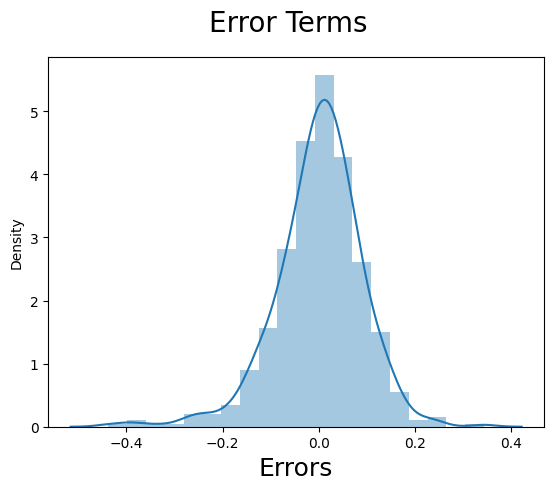

In [160]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model


## 8.1 Applying the scaling on the test sets

In [161]:
X.columns

Index(['yr', 'temp', 'windspeed', 'summer', 'winter', 'LightSnow',
       'MistCloudy', 'Sun', 'Aug', 'Oct', 'Sep'],
      dtype='object')

In [162]:
num_vars = ["temp", "atemp",	"hum",	"windspeed", "cnt"]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [163]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 8.2 Dividing into X_test and y_test

In [164]:
y_test = df_test.pop('cnt')
X_test = df_test

In [165]:
all_columns = X_train.columns.tolist()
remain_columns = X.columns.tolist()
drop_columns = [col for col in all_columns if col not in remain_columns]
drop_columns

['holiday',
 'workingday',
 'atemp',
 'hum',
 'spring',
 'Mon',
 'Sat',
 'Thu',
 'Tue',
 'Wed',
 'Dec',
 'Feb',
 'Jan',
 'Jul',
 'Jun',
 'Mar',
 'May',
 'Nov']

In [166]:
# Adding constant variable to test dataframe
X_test_final = sm.add_constant(X_test)
X_test_final = X_test_final.drop(drop_columns, axis = 1)

In [167]:
# Making predictions using the fourth model
y_pred_final = final_model.predict(X_test_final)

## Step 9: Model Evaluation


### 9.1 Calculate R2 for prediction

In [168]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred_final)

0.7991434783036306

The R squared of final model is `0.836`, and the R squared of the prediction is `0.799`.
It's not big gap between this, witch indicate the model is very good.

## 9.2 Plotting to understand the spread

Text(0, 0.5, 'y_pred')

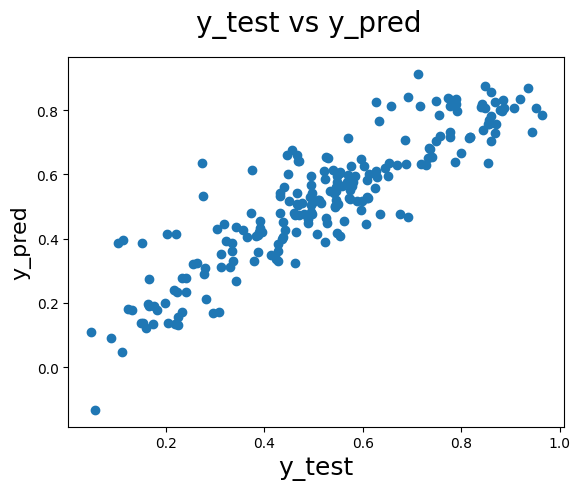

In [169]:
fig = plt.figure()
plt.scatter(y_test, y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)